In [11]:
from tensorflow import keras
from tensorflow.keras import layers

from keras.datasets import mnist

import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

import tensorflow as tf

import random

In [12]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

8


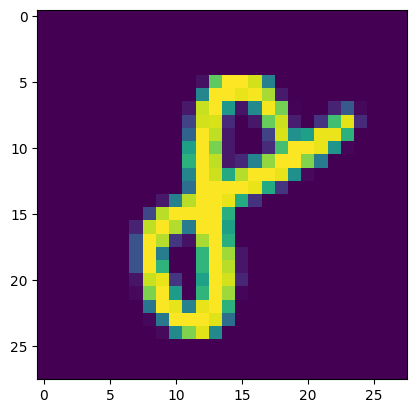

In [13]:
# Display a random element of the dataset
element = random.randint(0, len(x_train) - 1)

print(y_train[element])


plt.imshow(x_train[element])
plt.show()

In [14]:
# Normalize the data set
max = x_train.max()

x_train = x_train / max
x_test = x_test / max

In [15]:
# Generate one hot encoding for the y
categories = y_train.max() - y_train.min() + 1

y_train = np.eye(categories)[y_train]
y_test = np.eye(categories)[y_test]

In [18]:
# Define the model
model = keras.Sequential(
    [
        # Input
        layers.Flatten(),

        # Hidden
        layers.Dense(28 * 28, activation="relu"),
        layers.Dense(20, activation="relu"),
        layers.Dense(20, activation="relu"),

        # Output
        layers.Dense(categories, activation="softmax")
    ]
)


# Compile the model
learning_rate = 0.01

model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [19]:
# Train the model
batch_size = 32
epochs = 10

model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3176 - accuracy: 0.9087
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1733 - accuracy: 0.9554
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1488 - accuracy: 0.9619
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1305 - accuracy: 0.9676
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1191 - accuracy: 0.9723
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1125 - accuracy: 0.9741
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0963 - accuracy: 0.9776
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0954 - accuracy: 0.9779
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0945 - accuracy: 0.9783
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.084

In [20]:
# Test the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1556 - accuracy: 0.9714


[0.15556690096855164, 0.9714000225067139]

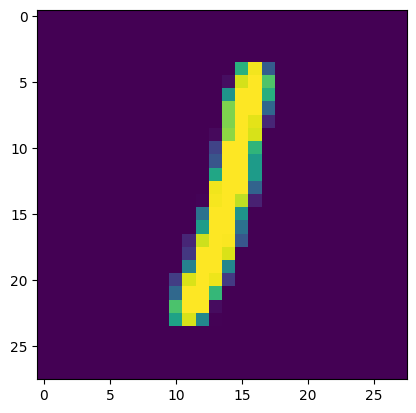

1/1 [==============================] - 0s 52ms/step
element: 6868
prediction: 1
real value: 1


In [21]:
# Make predictions on a random element
element = random.randint(0, len(y_test) - 1)

# Show the element
plt.imshow(x_test[element].reshape(28, 28))
plt.show()


# Predict the value
prediction = model.predict(x_test[element].reshape(1, 28, 28)).reshape(-1)
real_value = y_test[element]


# Format the output
prediction_category = prediction.argmax()
real_value_category = real_value.argmax()


# Print the result
print(f"element: {element}")
print(f"prediction: {prediction_category}\nreal value: {real_value_category}")

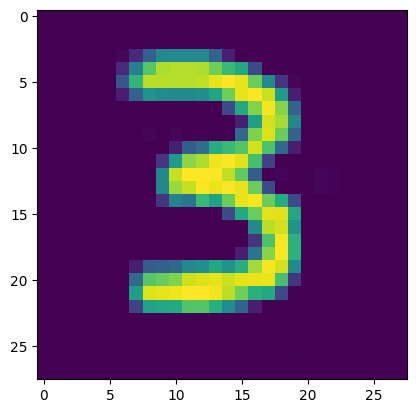

1/1 [==============================] - 0s 17ms/step
prediction: 3 - 100.


In [22]:
# Test the model with a local image

# Load the image
image = imread("custom_image/test.png")

# Display the image
plt.imshow(image)
plt.show()


# Reshape to the input of the model
image_reshaped = image.reshape(1, 28, 28)

# Predict the value
prediction = model.predict(image_reshaped).reshape(-1)


# Format the output
prediction_category = prediction.argmax()
certanty = prediction.max()


# Print the result
print(f"prediction: {prediction_category} - {np.format_float_positional(certanty * 100, precision=0)}")
